In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

plt.style.use("ggplot")


In [3]:
df = pd.read_csv("C:/Users/ashok/Downloads/project/ai-disaster-management/data/synthetic_disaster_data.csv") 

df.head()


,gas,flame,dev_mg,label
0,733.595419,0.0,50.549650,SAFE
1,698.654874,0.0,31.136582,SAFE
2,715.394701,0.0,64.650469,SAFE
3,629.824735,0.0,38.658804,SAFE
4,589.894661,0.0,59.367793,SAFE


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gas     10000 non-null  float64
 1   flame   10000 non-null  float64
 2   dev_mg  10000 non-null  float64
 3   label   10000 non-null  object 
dtypes: float64(3), object(1)
memory usage: 312.6+ KB


,gas,flame,dev_mg
count,10000.000000,10000.000000,10000.000000
mean,1139.509177,0.400000,201.252715
std,512.540268,0.489922,193.631080
min,433.337349,0.000000,-42.837595
25%,706.794860,0.000000,46.520451
50%,827.210191,0.000000,79.368106
75%,1695.940600,1.000000,391.875292
max,2361.992062,1.000000,776.093353


C:\Users\ashok\AppData\Local\Temp\ipykernel_19228\422644912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["label"], palette="viridis")


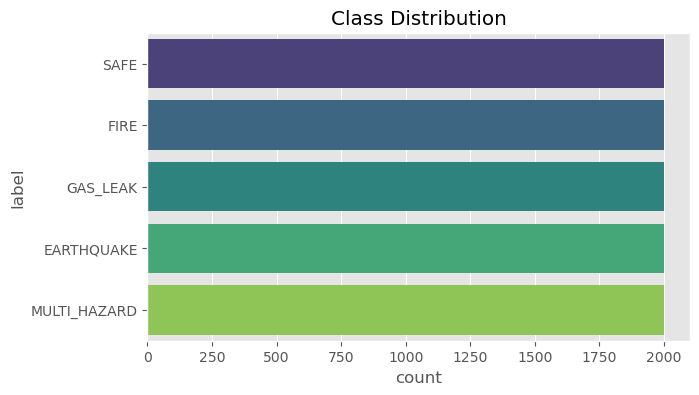

In [5]:
plt.figure(figsize=(7,4))
sns.countplot(y=df["label"], palette="viridis")
plt.title("Class Distribution")
plt.show()


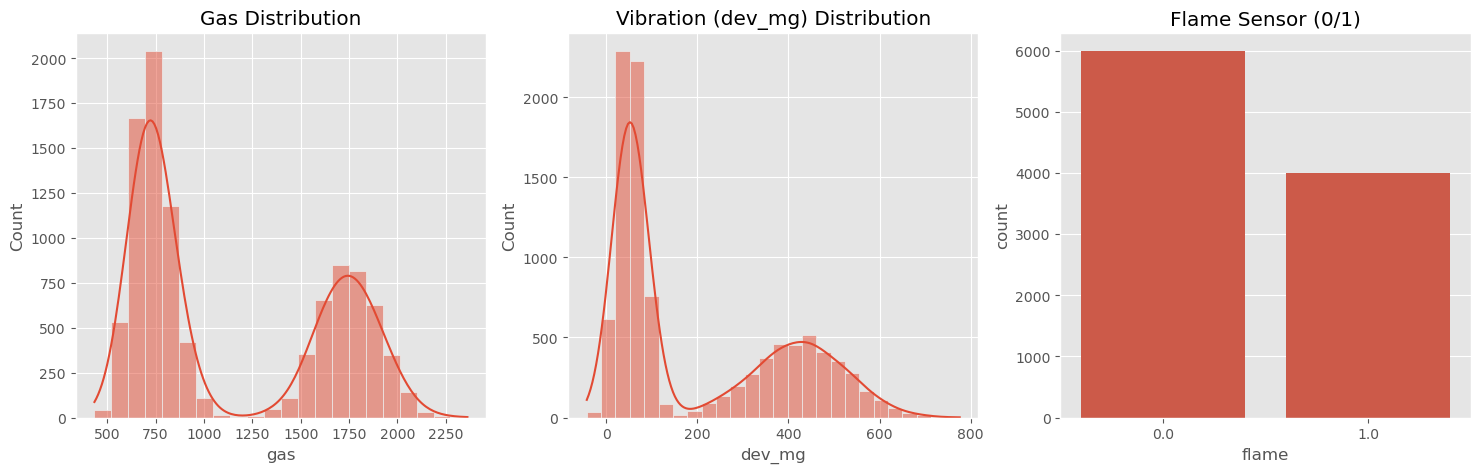

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(df["gas"], kde=True, ax=ax[0])
ax[0].set_title("Gas Distribution")

sns.histplot(df["dev_mg"], kde=True, ax=ax[1])
ax[1].set_title("Vibration (dev_mg) Distribution")

sns.countplot(x=df["flame"], ax=ax[2])
ax[2].set_title("Flame Sensor (0/1)")

plt.show()


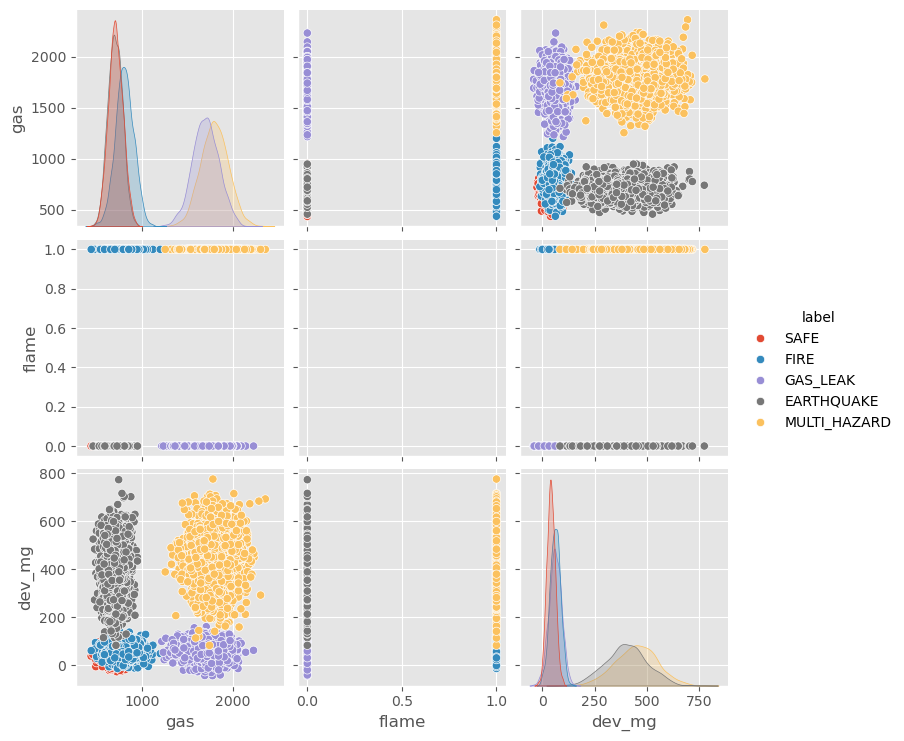

In [7]:
sns.pairplot(df, hue="label", height=2.5)


In [8]:
X = df[["gas", "flame", "dev_mg"]]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [9]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [10]:
y_pred = model.predict(X_test)


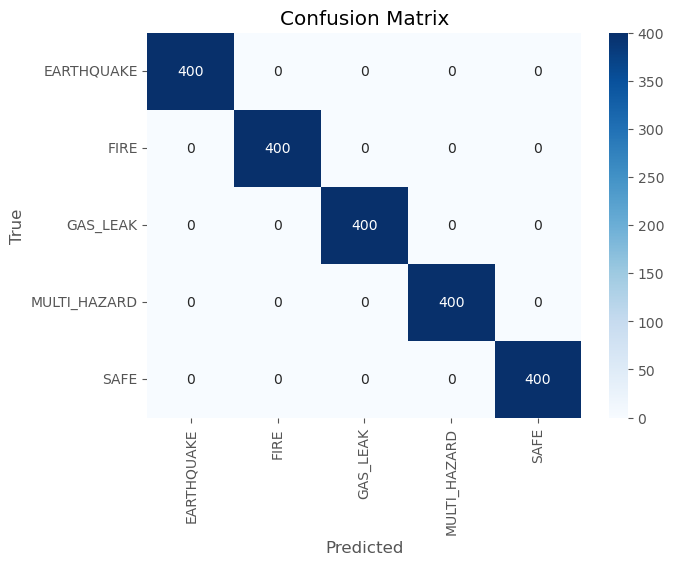

In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


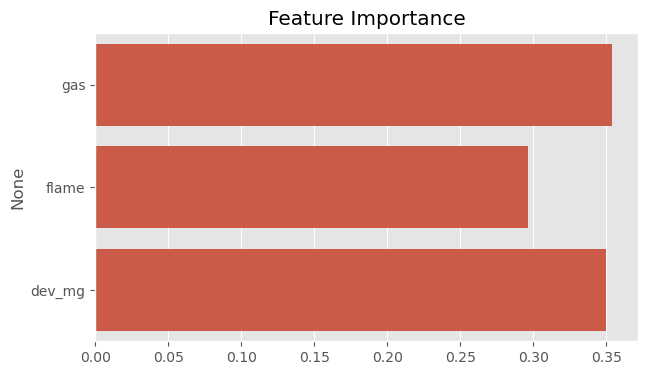

In [12]:
plt.figure(figsize=(7,4))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()


In [13]:
joblib.dump(model, "hazard_rf_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [14]:
sample = np.array([[1600, 1, 80]])     # Example: gas high + flame = FIRE
prediction = model.predict(sample)
print("Predicted Hazard: ", prediction[0])


Predicted Hazard:  MULTI_HAZARD


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
